In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/bsc-phase-two-project/main/data/kc_house_data.csv')

### Check the correlation for price

In [3]:
# Check everyting correlated to price
price_corr = df.corr()['price'].map(abs).sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

In [4]:
### New Data Frame with

In [5]:
df = df[['price', 'sqft_living', 'grade', 
         'yr_built', 'zipcode', 'bathrooms', 'view', 'bedrooms', 'condition', 
         'waterfront', 'floors', 'sqft_basement', 'condition']]
df

,price,sqft_living,grade,yr_built,zipcode,bathrooms,view,bedrooms,condition,waterfront,floors,sqft_basement,condition
0,221900.0,1180,7,1955,98178,1.00,0.0,3,3,NaN,1.0,0.0,3
1,538000.0,2570,7,1951,98125,2.25,0.0,3,3,0.0,2.0,400.0,3
2,180000.0,770,6,1933,98028,1.00,0.0,2,3,0.0,1.0,0.0,3
3,604000.0,1960,7,1965,98136,3.00,0.0,4,5,0.0,1.0,910.0,5
4,510000.0,1680,8,1987,98074,2.00,0.0,3,3,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,8,2009,98103,2.50,0.0,3,3,0.0,3.0,0.0,3
21593,400000.0,2310,8,2014,98146,2.50,0.0,4,3,0.0,2.0,0.0,3
21594,402101.0,1020,7,2009,98144,0.75,0.0,2,3,0.0,2.0,0.0,3
21595,400000.0,1600,8,2004,98027,2.50,0.0,3,3,NaN,2.0,0.0,3


### Check Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_living    21597 non-null  int64  
 2   grade          21597 non-null  int64  
 3   yr_built       21597 non-null  int64  
 4   zipcode        21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   view           21534 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   waterfront     19221 non-null  float64
 10  floors         21597 non-null  float64
 11  sqft_basement  21597 non-null  object 
 12  condition      21597 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


### Drop NA

In [7]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)

### Change Data Types

In [8]:
df['price'] = df['price'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
# df['view'] = df['view'].astype(int) #has null values
df['floors'] = df['floors'].astype(int)
df['view'] = df['view'].astype(int)
df['waterfront'] = df['waterfront'].astype(int)

In [9]:
#dropped rows with ? in the sqft_basement column
df = df[~df['sqft_basement'].isin(['?'])]

### Price and sqft_living Correlation

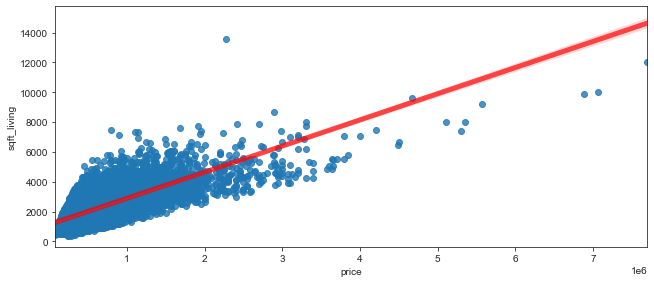

In [37]:
fig, ax,  = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=5.0)
sns.set_style("ticks")

x = df.price
y = df.sqft_living

sns.regplot(x,y, line_kws={"color":"r","alpha":0.7,"lw":5});

### Bedrooms and Price Correlation

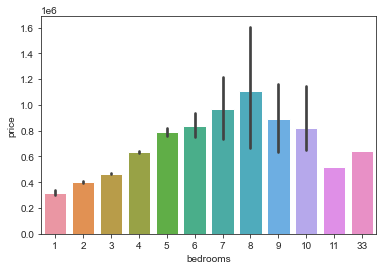

In [11]:
sns.barplot(x="bedrooms", y="price", data=df);

### Waterfront and Price Correlation

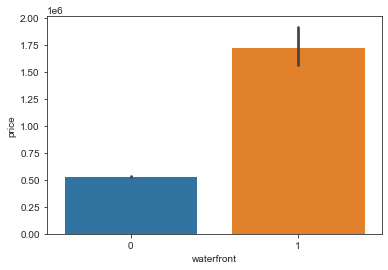

In [12]:
sns.barplot(x="waterfront", y="price", data=df);

### Floors and Price Correlation

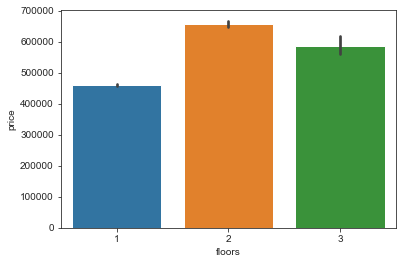

In [13]:
sns.barplot(x="floors", y="price", data=df);

### View and Price Correlation

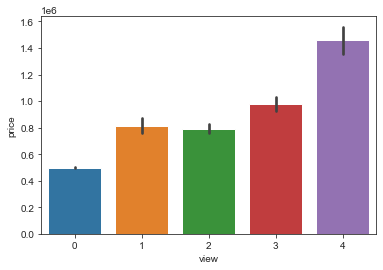

In [14]:
sns.barplot(x="view", y="price", data=df);

### Grade and Price Correlation

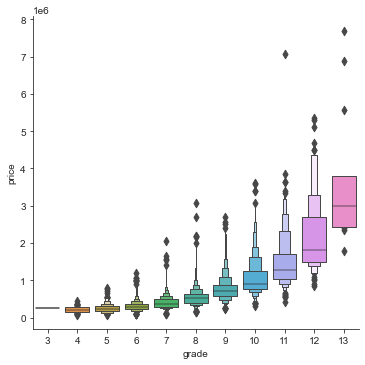

In [15]:
sns.catplot(x="grade", y="price", kind="boxen", data=df.sort_values("grade"));

### OHE for condition

In [16]:
# Isolate independent and depdentent variables 
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

In [17]:
#OHE for condition (1-5 scale)
# Initialize a One Hot Encoder
ohe = OneHotEncoder(sparse=False)

# Fir the encoder to the training data
ohe.fit(X_train[['condition']])

# Transform the borough column
train_condition = ohe.transform(X_train[['condition']])
             
# Turn the transformed data into a dataframe
# so we can add it to the end of our training dataframe
train_condition = pd.DataFrame(train_condition, 
                        # This is how you get
                        # the feature name from
                        # a one hot encoder              # Set the index so it matched the training data
                        columns=ohe.get_feature_names(), index=X_train.index)

# Add the transformed columns to the X_train dataframe
train_condition = pd.concat([X_train.drop('condition', axis = 1), train_condition], axis = 1)

# Transform the testing data
test_condition = ohe.transform(X_test[['condition']])

# Turn the transformed data into a dataframe
test_condition = pd.DataFrame(test_condition, 
                        columns=ohe.get_feature_names(), index=X_test.index)

# Add the transformed columns to the X_test dataframe
test_condition = pd.concat([X_test.drop('condition', axis = 1), test_condition], axis = 1)


In [18]:
#OHE column names 
ohe.get_feature_names().tolist()

['x0_1',
 'x0_2',
 'x0_3',
 'x0_4',
 'x0_5',
 'x1_1',
 'x1_2',
 'x1_3',
 'x1_4',
 'x1_5']

In [19]:
condition = ['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']

### OHE for zipcode

In [20]:
#OHE for zipcode 
# Initialize a One Hot Encoder
ohe = OneHotEncoder(sparse=False)

# Fir the encoder to the training data
ohe.fit(X_train[['zipcode']])

# Transform the borough column
train_zipcode = ohe.transform(X_train[['zipcode']])
             
# Turn the transformed data into a dataframe
# so we can add it to the end of our training dataframe
train_zipcode = pd.DataFrame(train_zipcode, 
                        # This is how you get
                        # the feature name from
                        # a one hot encoder              # Set the index so it matched the training data
                        columns=ohe.get_feature_names(), index=X_train.index)

# Add the transformed columns to the X_train dataframe
train_zipcode = pd.concat([X_train.drop('zipcode', axis = 1), train_zipcode], axis = 1)


# Transform the testing data
test_zipcode = ohe.transform(X_test[['zipcode']])

# Turn the transformed data into a dataframe
test_zipcode = pd.DataFrame(test_zipcode, 
                        columns=ohe.get_feature_names(), index=X_test.index)
# Add the transformed columns to the X_test dataframe
test_zipcode = pd.concat([X_test.drop('zipcode', axis = 1), test_zipcode], axis = 1)

test_zipcode = pd.concat([test_zipcode, test_condition], axis = 1)
train_zipcode = pd.concat([train_zipcode, train_condition], axis = 1)


In [21]:
zipcode = ['x0_98001','x0_98002','x0_98003','x0_98004','x0_98005','x0_98006','x0_98007','x0_98008','x0_98010','x0_98011','x0_98014','x0_98019','x0_98022','x0_98023','x0_98024','x0_98027','x0_98028','x0_98029','x0_98030','x0_98031','x0_98032','x0_98033','x0_98034','x0_98038','x0_98039','x0_98040','x0_98042','x0_98045','x0_98052','x0_98053','x0_98055','x0_98056','x0_98058','x0_98059','x0_98065','x0_98070','x0_98072','x0_98074','x0_98075','x0_98077','x0_98092','x0_98102','x0_98103','x0_98105','x0_98106','x0_98107','x0_98108','x0_98109','x0_98112','x0_98115','x0_98116','x0_98117','x0_98118','x0_98119','x0_98122','x0_98125','x0_98126','x0_98133','x0_98136','x0_98144','x0_98146','x0_98148','x0_98155','x0_98166','x0_98168','x0_98177','x0_98178','x0_98188','x0_98198','x0_98199']

### Run a Train Test Split

In [22]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

### Make Final Model

In [23]:
model_7_train = X_train[['sqft_living', 'grade',  
                        'bathrooms', 'view', 'yr_built', 'sqft_basement', 'zipcode', 'condition',
                         'bedrooms', 'waterfront','floors']]

model_7_test = X_test[['sqft_living', 'grade',
                          'bathrooms', 'view', 'yr_built', 'sqft_basement', 'zipcode', 'condition',
                         'bedrooms', 'waterfront','floors']]

model_7_train['price'] = y_train
model_7_train = model_7_train[np.abs(stats.zscore(model_7_train['price'])) < 1]
y_train = model_7_train.price
model_7_train.drop('price', axis=1, inplace=True)

model7 = LinearRegression()
model7.fit(model_7_train, y_train)

train_preds = model7.predict(model_7_train)
test_preds = model7.predict(model_7_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 126380.92026185518
Test error: 243932.81486939715


### Model Evaluation 

In [24]:
bined = pd.qcut(df['price'], q=8)
binned_df = pd.DataFrame(bined)

In [25]:
binned_df['price'].value_counts()

(322000.0, 385000.0]     2696
(77999.999, 259000.0]    2651
(535000.0, 645000.0]     2648
(825012.5, 7700000.0]    2643
(259000.0, 322000.0]     2641
(385000.0, 450000.0]     2638
(450000.0, 535000.0]     2614
(645000.0, 825012.5]     2612
Name: price, dtype: int64

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(model_7_train, y_train)

LinearRegression()

In [28]:
e = lr.predict(model_7_train) - y_train

In [29]:
binned_df['error'] = e

In [30]:
binned_df.head()

,price,error
0,"(77999.999, 259000.0]",NaN
1,"(535000.0, 645000.0]",4530.395048
2,"(77999.999, 259000.0]",NaN
3,"(535000.0, 645000.0]",-136395.006439
4,"(450000.0, 535000.0]",-82079.805174


In [31]:
new_df = binned_df.groupby('price').mean()['error']
new_df = pd.DataFrame(new_df).reset_index()

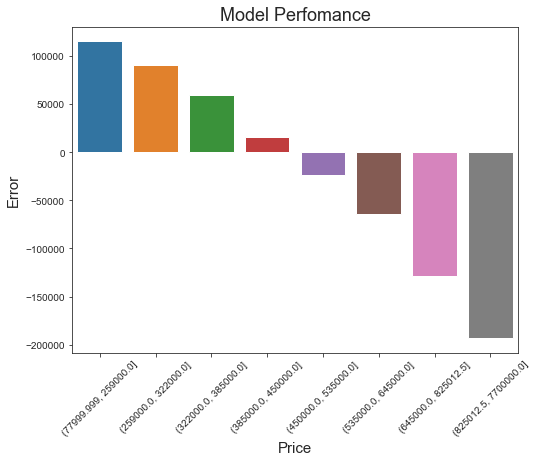

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x = 'price', y = 'error', data = new_df)
plt.xticks(rotation=45)
plt.xlabel('Price',fontsize = 15)
plt.ylabel('Error',fontsize = 15)
plt.title('Model Perfomance',fontsize = 18);

In our model we used the most correlated features to get the most accuarate model.  We began the model by examining our data types and converting the fatures to integers.  Next we removed null values and looked at the correlation between the features and price in order to decide what to use in our model.  To use the condition and zipcode features we used One Hot Encoder to make high numbers equally important.  We then preformed a train test split on our data and made our final model. 
This had a trianing error of 126380.9 and a test error of 243932.8.  This caused a differnce of 117551.9
We can see from our model evaluation that it preforms best in prices from 385000-535000 dollars.

In [35]:
model_7_train

,sqft_living,grade,bathrooms,view,yr_built,sqft_basement,zipcode,condition,condition,bedrooms,waterfront,floors
18829,2650,9,2,3,1977,880.0,98034,3,3,3,0,1
9869,870,6,1,2,1921,0.0,98105,4,4,2,0,1
4119,1720,7,1,0,1956,0.0,98188,3,3,4,0,2
8109,1220,7,1,0,1926,300.0,98117,3,3,2,0,1
20809,2420,8,2,0,2014,0.0,98038,3,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3776,1630,7,1,0,1958,0.0,98033,3,3,3,0,1
7555,1730,8,1,0,1955,460.0,98125,3,3,3,0,2
20131,1420,8,1,0,2008,280.0,98144,3,3,3,0,2
5899,1030,5,1,0,1912,0.0,98042,3,3,3,0,1


In [36]:
df

,price,sqft_living,grade,yr_built,zipcode,bathrooms,view,bedrooms,condition,waterfront,floors,sqft_basement,condition
0,221900,1180,7,1955,98178,1,0,3,3,0,1,0.0,3
1,538000,2570,7,1951,98125,2,0,3,3,0,2,400.0,3
2,180000,770,6,1933,98028,1,0,2,3,0,1,0.0,3
3,604000,1960,7,1965,98136,3,0,4,5,0,1,910.0,5
4,510000,1680,8,1987,98074,2,0,3,3,0,1,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,1530,8,2009,98103,2,0,3,3,0,3,0.0,3
21593,400000,2310,8,2014,98146,2,0,4,3,0,2,0.0,3
21594,402101,1020,7,2009,98144,0,0,2,3,0,2,0.0,3
21595,400000,1600,8,2004,98027,2,0,3,3,0,2,0.0,3
